## UMAP for GO Term vs TF-IDF Dataset for S. Cerevisiae genes


In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle as pkl
import base64
import csv

In [2]:
!pwd

/home/vaslem/code/addalova_bip/code


### Data Preprocessing
First: Check out dataset, sample (if necessary so that you don't overfit), and remove missing values.

In [3]:
with open("../processed_data/geneOntologyDataset.pkl", 'rb') as inp:
    [pivoted, tfidfPivoted] = pkl.load(inp)

In [4]:
genedata = pd.DataFrame(tfidfPivoted['P'].todense()) # F / P / C
genedata['Standard Name'] = pivoted['P'].index

In [5]:
genedata.head().sample(10, axis=1)

,2657,946,1972,284,2887,2981,2480,2336,1538,2780
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
genedata.shape

(4341, 2990)

Since UMAP cannot parse strings, we need to make sure that every string is either dropped or converted to a float:

In [7]:
#genedata["Standard Name"] = pd.to_numeric(genedata["Standard Name"], downcast="float")

In [8]:
from sklearn import preprocessing

In [9]:
le = preprocessing.LabelEncoder()
c = le.fit_transform(genedata["Standard Name"])

In [10]:
c #this here is now the newly transformed data column "Standard Name" into non-string values.

array([   0,    1,    2, ..., 4338, 4339, 4340])

Now we can process the data by dropping and imputing. X and y will be used in UMAP (particularly X will be used in the data reduction, whereas y will be used in the supervised clustering as labels)


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [33]:
genedata.rename(columns={'Standard Name': 'gene'}, inplace=True)

In [34]:
genedata

,0,1,2,3,4,5,6,7,8,9,...,2980,2981,2982,2983,2984,2985,2986,2987,2988,gene
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAC1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAC3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAD10
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAD14
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAD15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZRT2
4337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZRT3
4338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZTA1
4339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ZUO1


In [12]:
X, y= genedata.drop("Standard Name", axis=1) , genedata[["Standard Name"]].values.flatten()
pipe = make_pipeline(SimpleImputer(strategy="mean"))
X = pipe.fit_transform(X.copy())

### Data Reduction with Manifold:

In [20]:
import umap.umap_ as umap

In [21]:
#reducer = umap.UMAP()

In [23]:
from sklearn.decomposition import PCA

(4341, 2)

### Plot the results:

In [37]:
fDf = pd.read_csv('../processed_data/fluorescence_dataset.csv')
fDf.dropna(subset=['intensity'],inplace=True)
fDf = genedata.merge(fDf[['gene','intensity']], on='gene', how='left')
fDf.head()

,0,1,2,3,4,5,6,7,8,9,...,2981,2982,2983,2984,2985,2986,2987,2988,gene,intensity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAC1,1.092609e-01
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAC3,8.112094e-03
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAD10,6.613757e-04
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAD14,2.173913e-03
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAD15,1.156482e-18


In [44]:
whole_x.shape

(4160, 2989)

In [45]:
whole_y.shape

(4160,)

In [47]:
vmask

0        True
1        True
2        True
3        True
4       False
        ...  
4336     True
4337     True
4338     True
4339     True
4340     True
Name: intensity, Length: 4160, dtype: bool

In [55]:
mask = ~fDf['intensity'].isnull() & (fDf['intensity'] > 0)
whole_x = fDf.iloc[:, :2989].loc[mask]
whole_y = np.log(fDf['intensity'][mask])
vmask = (whole_y > -20)
x = whole_x[vmask]
y = whole_y[vmask]

In [56]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
plt.rcParams["figure.figsize"] = (20,20) 

In [61]:
pca = PCA(50)
pcaX = pca.fit_transform(x)

In [76]:
manifold = umap.UMAP(min_dist=0.001, n_neighbors=500, metric='cosine').fit(x) #here we are using UMAP to fit the X data defined above(not reduced yet)
X_reduced = manifold.transform(x) #here we are transforming X using manifold (data reduction!)
X_reduced.shape #running this will show that the data is now reduced to 2 dimensions

(4146, 2)

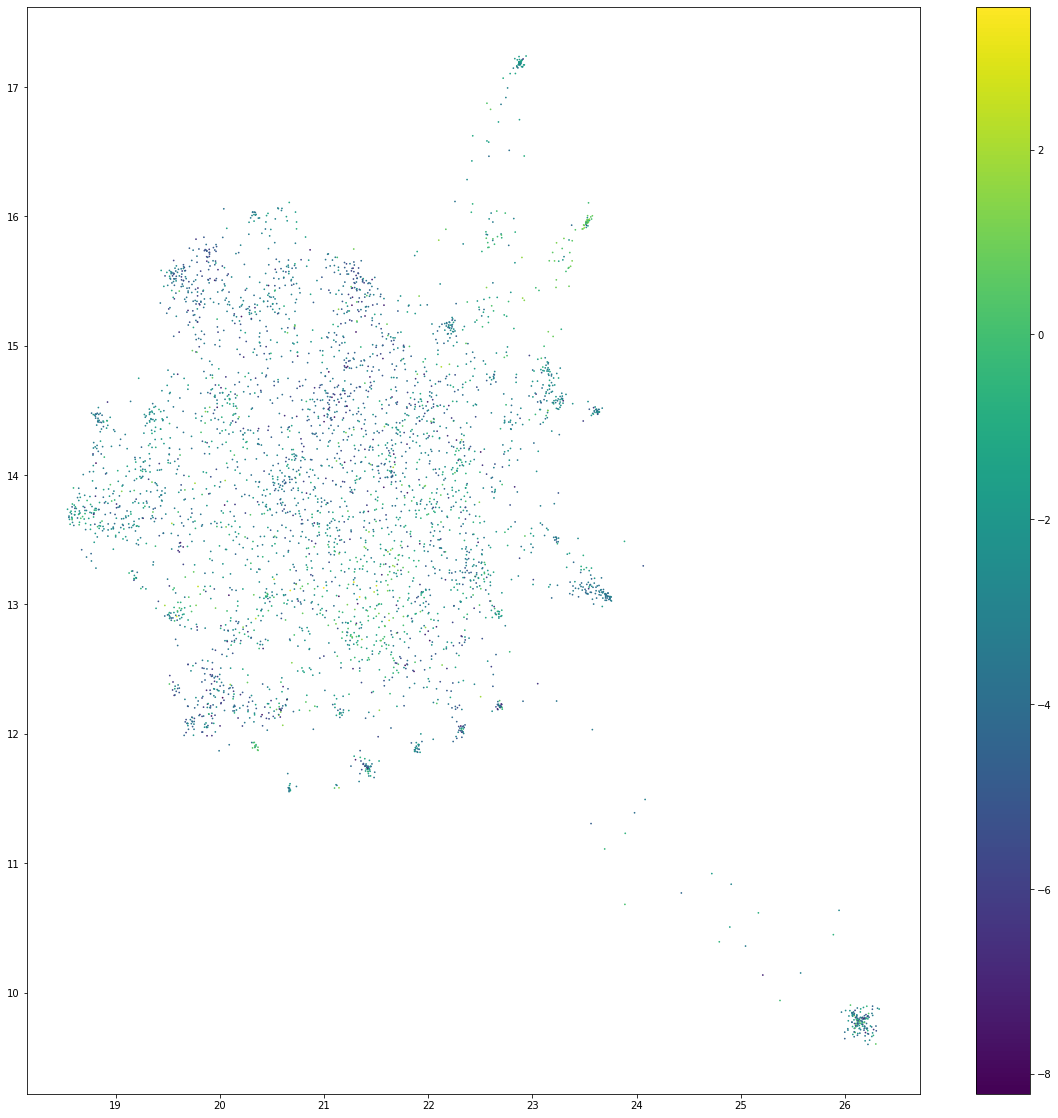

In [77]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=0.5); #c= here is the label. If we give c we are assigning cluster label
plt.colorbar()

In [123]:
min_y = y.min()
max_y = y.max()
bins = np.linspace(min_y, max_y+0.0001, 6)

In [124]:
labels = np.digitize(y, bins=bins)

In [125]:
labels.min()

1

In [126]:
bins

array([-8.21662849, -5.86392017, -3.51121185, -1.15850353,  1.19420479,
        3.54691312])

In [127]:
_,counts = np.unique(labels, return_counts=True)

In [130]:
inds = [m for n in [np.where(labels==l+1)[0][:counts.min()] for l in range(5)] for m in n]


In [137]:
stratified_x = x.iloc[inds, :]
stratified_y = labels[inds]

In [148]:
import umap.umap_ as umap
manifold_s = umap.UMAP(metric='cosine', n_neighbors=20, min_dist=0.01).fit(stratified_x) #here we are using UMAP to fit the X data defined above(not reduced yet)
X_reduced_s = manifold.transform(stratified_x) #here we are transforming X using manifold (data reduction!)
X_reduced_s.shape #running this will show that the data is now reduced to 2 dimensions

(295, 2)

<AxesSubplot:>

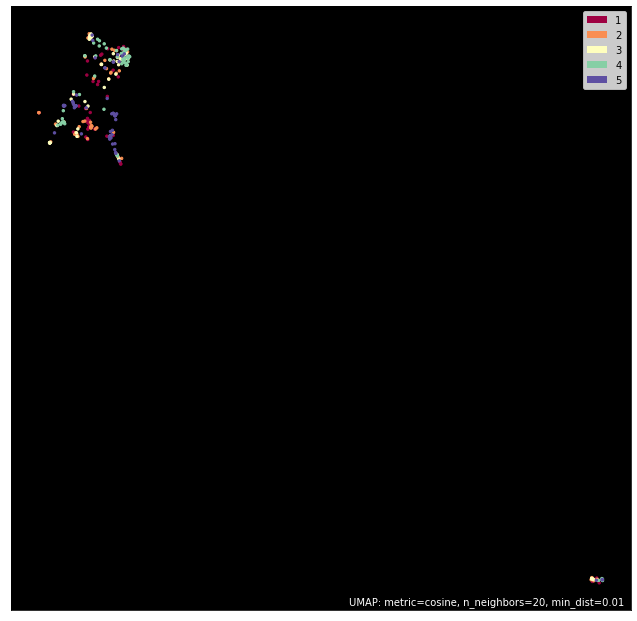

In [149]:
import umap.plot  # pip install umap-learn[plot]

umap.plot.points(manifold_s, labels=stratified_y, theme="viridis")

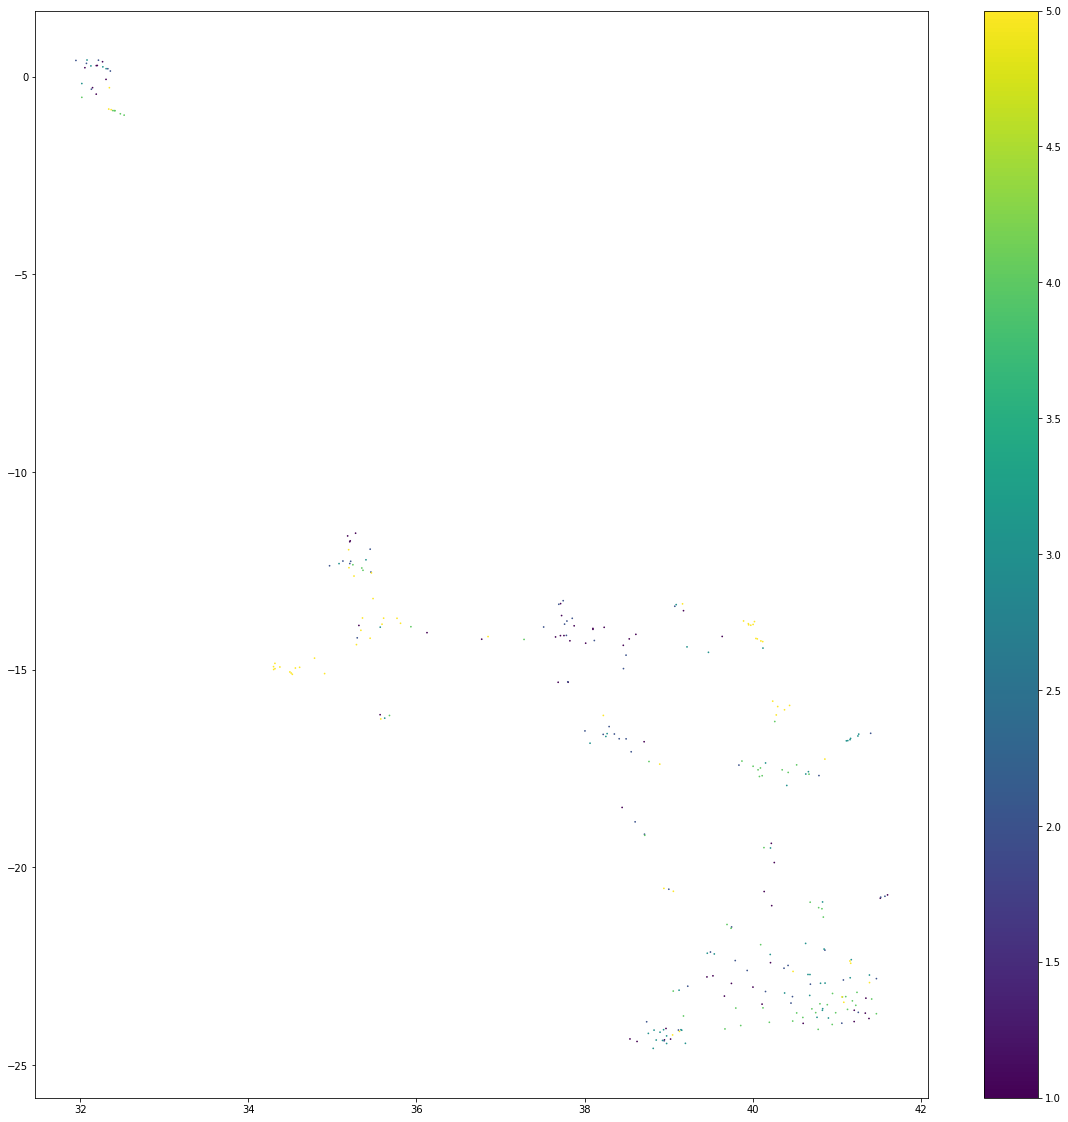

In [141]:
plt.scatter(X_reduced_s[:, 0], X_reduced_s[:, 1], c=stratified_y, s=0.5); #c= here is the label. If we give c we are assigning cluster label
plt.colorbar()

In [107]:
min(np.histogram(y, bins=bins)[0]

array([ 433, 2210, 1359,  144])

In [ ]:
manifold = umap.UMAP(min_dist=0.01, n_neighbors=200, metric='cosine').fit(x.T) #here we are using UMAP to fit the X data defined above(not reduced yet)
X_reducedT = manifold.transform(x.T) #here we are transforming X using manifold (data reduction!)
X_reducedT.shape #running this will show that the data is now reduced to 2 dimensions

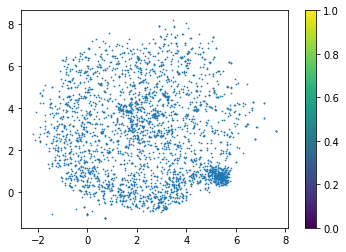

In [71]:
plt.scatter(X_reducedT[:, 0], X_reducedT[:, 1], s=0.5); #c= here is the label. If we give c we are assigning cluster label
plt.colorbar()

Doing UMAP with merged dataset (Frequencies + GO Data) using the Frequencies as labels

In [142]:
!pip install umap-learn[plot]

     |████████████████████████████████| 18.5 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 30.2 MB 16.2 MB/s eta 0:00:01     |███████████████████████████▌    | 26.0 MB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 15.8 MB 15.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 701 kB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 85 kB 5.0 MB/s  eta 0:00:01
     |████████████████████████████████| 3.3 MB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 178 kB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 3.9 MB/s  eta 0:00:01
     |████████████████████████████████| 835 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 

  Using cached locket-0.2.1-py2.py3-none-any.whl (4.1 kB)
  Using cached zict-2.0.0-py3-none-any.whl (10 kB)
     |████████████████████████████████| 97 kB 5.0 MB/s  eta 0:00:01
  Using cached tblib-1.7.0-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 302 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 9.0 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 4.0 MB/s eta 0:00:011
     |████████████████████████████████| 149 kB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 138 kB 10.0 MB/s eta 0:00:01
  Using cached HeapDict-1.0.1-py3-none-any.whl (3.9 kB)
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59428 sha256=0fad74e0a25f5f1febe16b839c0f6f9f47e4ec0906ab197d20f2170b00ca6a68
  Stored in directory: /home/vaslem/.cache/pip/wheels/6d/79/c4/c425774559165f472d32e5ef592ff9a71179abb31f05dbc98b
Successfully built datashape


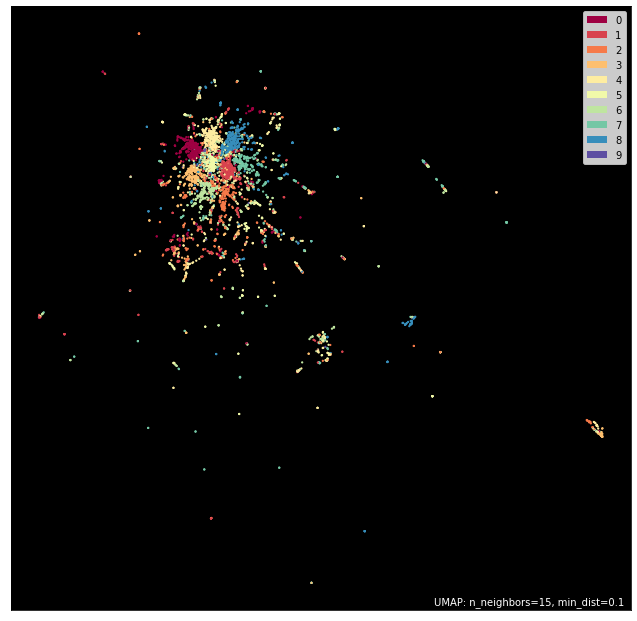

In [213]:
%pip install umap-learn[plot] #fancy plotting package 

zsh:1: no matches found: umap-learn[plot]
Note: you may need to restart the kernel to use updated packages.


In [218]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
import datashader.bundling as bd
import matplotlib.pyplot as plt
import colorcet
import matplotlib.colors
import matplotlib.cm
import bokeh.plotting as bpl
import bokeh.transform as btr
import holoviews as hv
import holoviews.operation.datashader as hd

In [290]:
m = umap.UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [291]:
manifold = m.fit(X,y)
X_reduced_2 = manifold.transform(X)

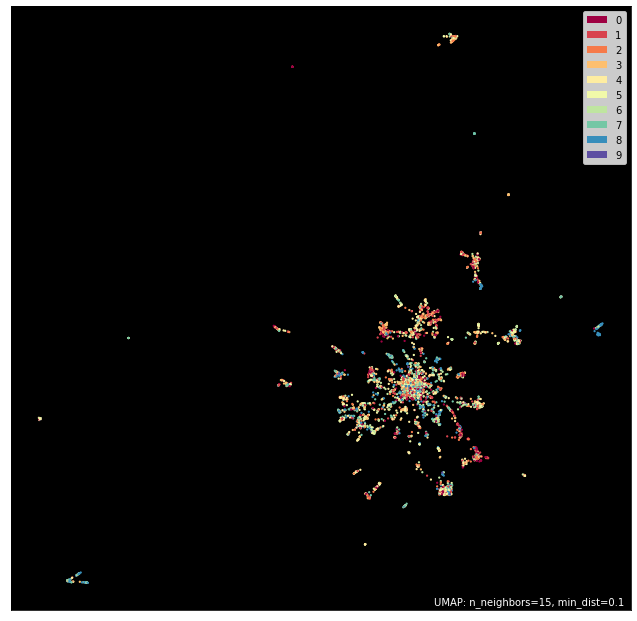

In [292]:
umap.plot.points(manifold, labels=clusterLabels, theme="viridis");

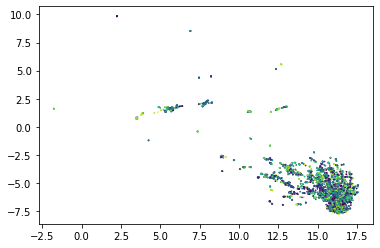

In [266]:
plt.scatter(X_reduced_2[:, 0], X_reduced_2[:, 1], c=clusterLabels, s=0.5);